In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("protests.csv")

Creating dummy variables

In [3]:
# Creating dummy variables for state response.

state_response = ["stateresponse1", "stateresponse2", "stateresponse3",
                  "stateresponse4", "stateresponse5", "stateresponse6", "stateresponse7"]

df = pd.get_dummies(
    data=df, prefix=["1", "2", "3", "4", "5", "6", "7"], columns=state_response)

df["accomodation"] = df['1_accomodation'] + df['2_accomodation'] + df['3_accomodation'] + \
    df['4_accomodation'] + df['5_accomodation'] + \
    df['6_accomodation'] + df['7_accomodation']

df["arrests"] = df['1_arrests'] + df['2_arrests'] + df['3_arrests'] + \
    df['4_arrests'] + df['5_arrests'] + df['6_arrests'] + df['7_arrests']

df["beatings"] = df['1_beatings'] + df['2_beatings'] + df['3_beatings'] + \
    df['4_beatings'] + df['5_beatings'] + df['6_beatings'] + df['7_beatings']

df["crowd_dispersal"] = df['1_crowd dispersal'] + df['2_crowd dispersal'] + \
    df['3_crowd dispersal'] + df['4_crowd dispersal'] + \
    df['5_crowd dispersal'] + df['6_crowd dispersal']

df["ignore"] = df['1_ignore'] + df['2_ignore'] + df['3_ignore']

df["killings"] = df['1_killings'] + df['2_killings'] + df['3_killings'] + \
    df['4_killings'] + df['5_killings'] + df['6_killings'] + df['7_killings']

df["shootings"] = df['1_shootings'] + df['2_shootings'] + \
    df['3_shootings'] + df['4_shootings'] + df['5_shootings']



In [4]:
# Creating dummy variables for protesters' demands.
demands = ['protesterdemand1', 'protesterdemand2',
           'protesterdemand3', 'protesterdemand4']

df = pd.get_dummies(data=df, prefix=["1", "2", "3", "4"], columns=demands)

df["labor_wage_dispute"] = df['1_labor wage dispute'] + \
    df['2_labor wage dispute'] + \
    df['3_labor wage dispute'] + df['4_labor wage dispute']

df["land_farm_issue"] = df['1_land farm issue'] + \
    df['2_land farm issue'] + df['3_land farm issue'] + df['4_land farm issue']

df["police_brutality"] = df['1_police brutality'] + \
    df['2_police brutality'] + df['3_police brutality'] + df['4_police brutality']

df["political_behavior_or_process"] = df['1_political behavior, process'] + \
    df['2_political behavior, process'] + \
    df['3_political behavior, process'] + df['4_political behavior, process']

df["price_hike_or_tax_policy"] = df['1_price increases, tax policy'] + df['2_price increases, tax policy'] + \
    df['3_price increases, tax policy'] + df['4_price increases, tax policy']

df["removal_of_politician"] = df['1_removal of politician'] + \
    df['2_removal of politician'] + \
    df['3_removal of politician'] + df['4_removal of politician']
    
df["social_restrictions"] = df['1_social restrictions'] + \
    df['2_social restrictions'] + df['3_social restrictions']


In [5]:
# drop the columns that are not needed.
df = df.drop(['1_accomodation', '2_accomodation', '3_accomodation', '4_accomodation', '5_accomodation', '6_accomodation', '7_accomodation', '1_arrests', '2_arrests', '3_arrests', '4_arrests', '5_arrests', '6_arrests', '7_arrests', '1_beatings', '2_beatings', '3_beatings', '4_beatings', '5_beatings', '6_beatings', '7_beatings', '1_crowd dispersal', '2_crowd dispersal', '3_crowd dispersal', '4_crowd dispersal', '5_crowd dispersal', '6_crowd dispersal', '1_ignore', '2_ignore', '3_ignore', '1_killings', '2_killings', '3_killings', '4_killings', '5_killings', '6_killings', '7_killings', '1_shootings', '2_shootings', '3_shootings', '4_shootings', '5_shootings', '1_labor wage dispute', '2_labor wage dispute',
             '3_labor wage dispute', '4_labor wage dispute', '1_land farm issue', '2_land farm issue', '3_land farm issue', '4_land farm issue', '1_police brutality', '2_police brutality', '3_police brutality', '4_police brutality', '1_political behavior, process', '2_political behavior, process', '3_political behavior, process', '4_political behavior, process', '1_price increases, tax policy', '2_price increases, tax policy', '3_price increases, tax policy', '4_price increases, tax policy', '1_removal of politician', '2_removal of politician', '3_removal of politician', '4_removal of politician', '1_social restrictions', '2_social restrictions', '3_social restrictions', '4_.', '5_.', '7_.'], axis=1)

Structuring the date and time

In [6]:
# The column startday has its value recorded with a decimal. Remove the decimals from the values of these column.
df['New_day'] = df['startday'].astype(str).str.split('.').str[0]
df['New_month'] = df['startmonth'].astype(str).str.split('.').str[0]
df['New_year'] = df['startyear'].astype(str).str.split('.').str[0]


# Convert 'New_day', 'New_month', and 'New_year' to pandas date-time format.
df['New_day'] = pd.to_datetime(df['New_day'], format='%Y%m%d', errors='ignore')
df['New_month'] = pd.to_datetime(
    df['New_month'], format='%Y%m%d', errors='ignore')
df['New_year'] = pd.to_datetime(
    df['New_year'], format='%Y%m%d', errors='ignore')

# Create a new column called 'Start_date' that bundles df['New_day'], df['New_month'], and df['New_year'] in one column.
df['Start_date'] = df[['New_day', 'New_month', 'New_year']].apply(
    lambda x: '-'.join(x), axis=1)
df['Start_date'] = pd.to_datetime(
    df['Start_date'], format='%Y-%m-%d', errors='ignore')

# Repeat the process for the enddate
df['End_day'] = df['endday'].astype(str).str.split('.').str[0]
df['End_month'] = df['endmonth'].astype(str).str.split('.').str[0]
df['End_year'] = df['endyear'].astype(str).str.split('.').str[0]

df['End_day'] = pd.to_datetime(df['End_day'], format='%Y%m%d', errors='ignore')
df['End_month'] = pd.to_datetime(
    df['End_month'], format='%Y%m%d', errors='ignore')
df['End_year'] = pd.to_datetime(
    df['End_year'], format='%Y%m%d', errors='ignore')

df['End_date'] = df[['End_day', 'End_month', 'End_year']].apply(
    lambda x: '-'.join(x), axis=1)
df['End_date'] = pd.to_datetime(
    df['End_date'], format='%Y-%m-%d', errors='ignore')

# Ensure that there is no unsupported operand type(s) for -: 'str' and 'str' for 'Start_date' and 'End_date'
df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')
df['End_date'] = pd.to_datetime(df['End_date'], errors='coerce')

df['protest_length'] = (df['Start_date'] - df['End_date']).dt.days

# some of our timedelta values are negative. The follwoing code will fix this by retrieving the absolute value of the timedelta.
df['protest_length'] = df['protest_length'].abs()
# the last step is to iterate through the column protest_length and change the values 0 to 1.
df['protest_length'] = df['protest_length'].replace(0, 1)

# Now we can get rid of the time-related columns that are no longer needed.
df.drop(['New_day', 'New_month', 'New_year', 'startday', 'startmonth',
        'startyear', 'endday', 'endmonth', 'endyear', 'Start_date','End_date', 'End_day', 'End_month', 'End_year'], axis=1, inplace=True)



C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\4235300456.py:37: UserWarning: Parsing '18-11-1994' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')
C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\4235300456.py:37: UserWarning: Parsing '26-10-1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')
C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\4235300456.py:37: UserWarning: Parsing '28-10-1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')
C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\4235300456.py:37: UserWarning: Parsing '19-11-1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

Cleaning the data
________________

1. parsing the text

A closer look at the column participants reveal how noisy it is. As such, we will be using 4 functions that aimed at generating numerical valaues: parse_texts(), strip_chars(), have avg_hyphen(), and map_participants().
The function parse_texts() takes in a string, and then it checks if the string is one of the following:

    "dozens"
    "hundreds"
    "thousands"
    "tens of thousands"
    "hundreds of thousands"
    "millions"
    "million"

    If it is, then it returns the number that the string represents.

    The function strip_chars() will take in a string and then it removes all the characters that are not numbers.

    The function avg_hyphen(), will take in a string and then it checks if the string contains a hyphen. If it does, then it averages the two numbers that are on either side of the hyphen.

    Finally, we have map_participants(), which takes in a string and then it passes it to parse_texts(), strip_chars(), and avg_hyphen().

In [7]:
def parse_texts(x):
    x = x.lower()
    
    if x == "dozens":
        return 50
    elif x == "hundreds":
        return 500
    elif x == "thousands":
        return 5000
    elif x == "tens of thousands":
        return 50000
    elif "hundreds of thousands" in x:
        return 250000
    elif "millions" in x:
        return 2000000
    elif "million" in x:
        return 1000000
    
    
    elif "about " in x:
        return x[6:]
    elif "more than " in x:
        return x[10:]
    
    
    elif "several" in x:
        if "dozen" in x:
            return 50
        elif "hundred" in x:
            return 500
        elif "thousand" in x:
            return 5000
    
    
    elif "hundreds" in x:
        return 500
    elif "thousands" in x:
        return 5000
    
    else:
        return x
    
    
def strip_chars(x):
    banned_chars = "+s><,"
    x = "".join([c for c in x if c not in banned_chars])
    
    try:
        x = int(x)
    finally:
        return x


    
def avg_hyphen(x):
    accepted_chars = "1234567890-"
    ind = 0

    x = "".join([c for c in x if c in accepted_chars])
    
    for i in range(len(x)):
        if x[i] == "-":
            ind = i
    
    lower = x[:ind]
    upper = x[ind+1:]
    
    if (lower == "") or (upper==""):
        return np.nan
    
    return (int(lower) + int(upper)) /2
    
    
    
def map_participants(x):
    while type(x) == str:
        x = parse_texts(x)
        if type(x) == str:
            x = strip_chars(x)
        if type(x) == str:
            x = avg_hyphen(x)
        if type(x) == str:
            x = np.nan
    return x

In [8]:
df["participants"] = df["participants"].map(map_participants)

2. Handling missing values and other variables that are not relevent to the prediction

In [9]:
df.dropna(subset=["participants"], inplace=True)
df = df[df["region"] != "Oceania"]

In [10]:
# drop "notes", "sources", 'id', 'ccode', "protestnumber", "protesteridentity", "participants_category", 'location', 'participants_category'.
df.drop(['notes', 'sources', 'id', 'ccode', "protestnumber", "protesteridentity", "participants_category", 'location'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

country                          0
year                             0
region                           0
protest                          0
protesterviolence                0
participants                     0
accomodation                     0
arrests                          0
beatings                         0
crowd_dispersal                  0
ignore                           0
killings                         0
shootings                        0
labor_wage_dispute               0
land_farm_issue                  0
police_brutality                 0
political_behavior_or_process    0
price_hike_or_tax_policy         0
removal_of_politician            0
social_restrictions              0
protest_length                   0
dtype: int64

In [12]:
# check the unique valaues of all variables in the data frame.
unique = df.nunique()
unique

country                          165
year                              30
region                             7
protest                            1
protesterviolence                  2
participants                     306
accomodation                       3
arrests                            3
beatings                           3
crowd_dispersal                    4
ignore                             3
killings                           3
shootings                          2
labor_wage_dispute                 2
land_farm_issue                    2
police_brutality                   2
political_behavior_or_process      2
price_hike_or_tax_policy           2
removal_of_politician              3
social_restrictions                2
protest_length                   255
dtype: int64

In [13]:
# a close look at the unique values show that some of dummy variables ('accomodation','arrests',;;'beatings','crowd_dispersal','ignore', 'killings' and 'removal_of_politician') have more than 2 values (0 or 1). We need to Write a code that fixes this problem by changing the values of the spotted columns to 1 if the value is greater than 0 and 0 otherwise.

for col in ['accomodation', 'arrests', 'beatings', 'crowd_dispersal', 'ignore', 'killings', 'removal_of_politician']:
    df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

In [14]:
# check the unique valaues again to ensure the code worked.
unique = df.nunique()
unique

country                          165
year                              30
region                             7
protest                            1
protesterviolence                  2
participants                     306
accomodation                       2
arrests                            2
beatings                           2
crowd_dispersal                    2
ignore                             2
killings                           2
shootings                          2
labor_wage_dispute                 2
land_farm_issue                    2
police_brutality                   2
political_behavior_or_process      2
price_hike_or_tax_policy           2
removal_of_politician              2
social_restrictions                2
protest_length                   255
dtype: int64

In [15]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14314 entries, 0 to 16312
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        14314 non-null  object 
 1   year                           14314 non-null  int64  
 2   region                         14314 non-null  object 
 3   protest                        14314 non-null  int64  
 4   protesterviolence              14314 non-null  float64
 5   participants                   14314 non-null  float64
 6   accomodation                   14314 non-null  int64  
 7   arrests                        14314 non-null  int64  
 8   beatings                       14314 non-null  int64  
 9   crowd_dispersal                14314 non-null  int64  
 10  ignore                         14314 non-null  int64  
 11  killings                       14314 non-null  int64  
 12  shootings                      14314 non-null 

In [16]:
# Group the dataframe by protest length and then count the number of times each length appears.
new_df = df.groupby(['protest_length']).size().reset_index(name='counts')
new_df

,protest_length,counts
0,1.0,12774
1,2.0,183
2,3.0,93
3,4.0,62
4,5.0,27
...,...,...
250,367.0,1
251,373.0,1
252,386.0,1
253,836.0,1


In [17]:
# Group the dataframe by the number of protests per country.
num_protests = df.groupby(['country']).size().reset_index(name='counts')
num_protests

,country,counts
0,Afghanistan,38
1,Albania,67
2,Algeria,58
3,Angola,23
4,Argentina,112
...,...,...
160,Vietnam,18
161,Yemen,157
162,Yugoslavia,137
163,Zambia,91


In [26]:
# What is the average number of participants in a protest?
avg_participants = df.groupby(['country'])['participants'].mean()
for i in avg_participants.index:
    print(i, avg_participants[i])

Afghanistan 3090.0
Albania 12508.955223880597
Algeria 68179.74137931035
Angola 1617.391304347826
Argentina 41510.49107142857
Armenia 17880.29126213592
Austria 16488.46153846154
Azerbaijan 4719.967741935484
Bahrain 1383.4782608695652
Bangladesh 24918.74251497006
Belarus 5105.044117647059
Belgium 17355.0
Benin 6291.30303030303
Bhutan 92.0
Bolivia 5862.223076923077
Bosnia 2019.3548387096773
Botswana 2123.4375
Brazil 38724.92957746479
Bulgaria 7985.6557377049185
Burkina Faso 1717.8125
Burundi 1218.3854166666667
Cambodia 2494.3396226415093
Cameroon 1991.4285714285713
Canada 13266.702127659575
Cape Verde 500.0
Central African Republic 2578.2950819672133
Chad 3026.470588235294
Chile 12105.929487179486
China 14187.723577235773
Colombia 116066.41791044777
Comoros 401.39240506329116
Congo Brazzaville 495.7142857142857
Congo Kinshasa 642.4657534246576
Costa Rica 11805.405405405405
Croatia 11665.652173913044
Cuba 78.8659793814433
Cyprus 3138.68
Czech Republic 14636.95652173913
Czechoslovakia 11375

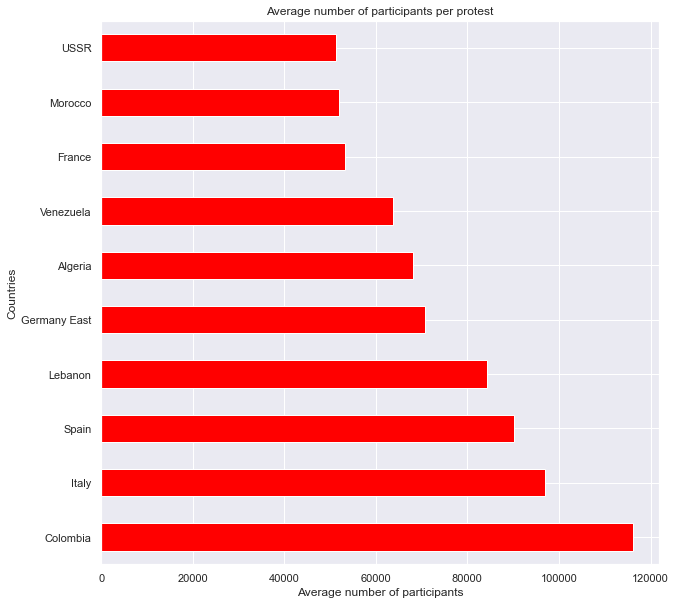

In [80]:
# sort the values of avg_participants in descending order and show 10 countries with the highest average number of participants.
highest_nums= avg_participants.sort_values(ascending=False)
top_10= highest_nums.head(10)
plt.figure(figsize=(10,10))
top_10.plot(kind='barh', color= 'red')
plt.title('Average number of participants per protest')
plt.xlabel('Average number of participants')
plt.ylabel('Countries')
plt.show()

In [42]:
# How the demands of protesters have changed over time.
df_new = df.groupby(['year'])['labor_wage_dispute', 'land_farm_issue', 'police_brutality', 'political_behavior_or_process', 'price_hike_or_tax_policy', 'removal_of_politician', 'social_restrictions'].sum()
df_new

C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\2896340.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df.groupby(['year'])['labor_wage_dispute', 'land_farm_issue', 'police_brutality', 'political_behavior_or_process', 'price_hike_or_tax_policy', 'removal_of_politician', 'social_restrictions'].sum()


,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_or_process,price_hike_or_tax_policy,removal_of_politician,social_restrictions
year,,,,,,,
1990,58.0,5.0,43.0,421.0,85.0,85,17.0
1991,41.0,5.0,28.0,257.0,32.0,56,9.0
1992,59.0,7.0,15.0,314.0,52.0,34,13.0
1993,66.0,7.0,19.0,227.0,37.0,19,8.0
1994,73.0,9.0,13.0,284.0,32.0,20,11.0
1995,75.0,14.0,24.0,226.0,36.0,41,13.0
1996,72.0,8.0,26.0,274.0,32.0,31,14.0
1997,77.0,10.0,31.0,351.0,37.0,33,13.0
1998,69.0,7.0,31.0,303.0,35.0,21,15.0


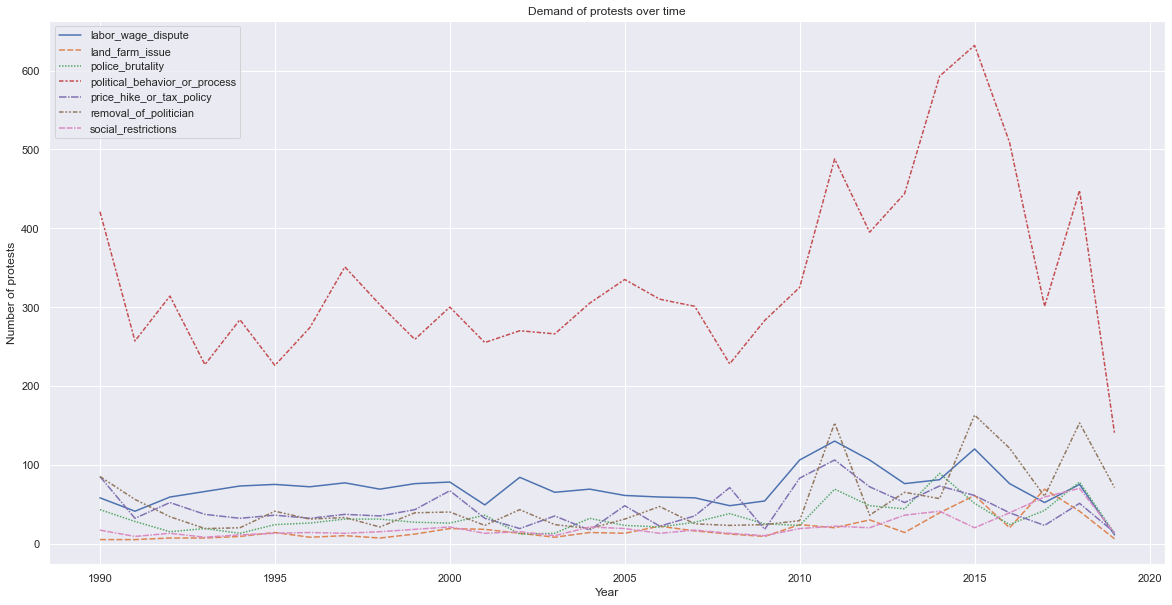

In [53]:
import seaborn as sns
plt.figure(figsize=(20, 10))

sns.set(style="darkgrid")

ax = sns.lineplot(data=df_new)

# Add title and labels to the plot.
plt.title('Demand of protests over time')
plt.xlabel('Year')
plt.ylabel('Number of protests')

plt.show()


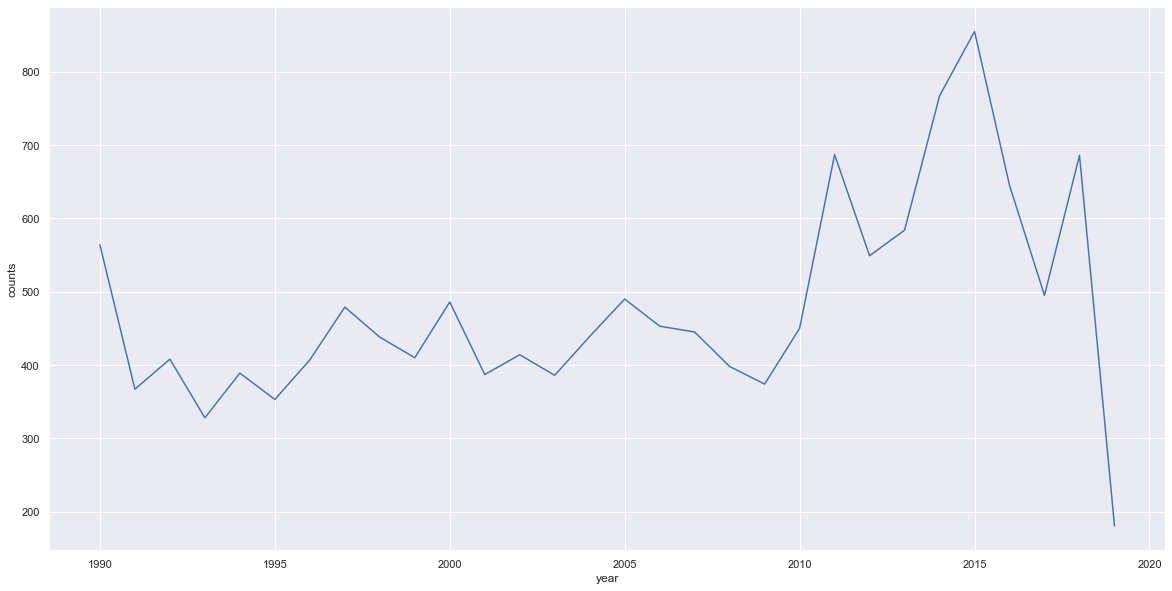

In [83]:
# How the protest participation has changed over time. 
nums_protest = df.groupby(
    ['year'])['protest'].count().reset_index(name='counts')
plt.figure(figsize=(20, 10))

sns.set(style="darkgrid")
ax = sns.lineplot(data=nums_protest, x='year', y='counts')




C:\Users\nimaz\AppData\Local\Temp\ipykernel_11724\1051705849.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_state = df.groupby(['year'])['accomodation', 'arrests', 'beatings', 'crowd_dispersal', 'ignore', 'killings', 'shootings'].sum()


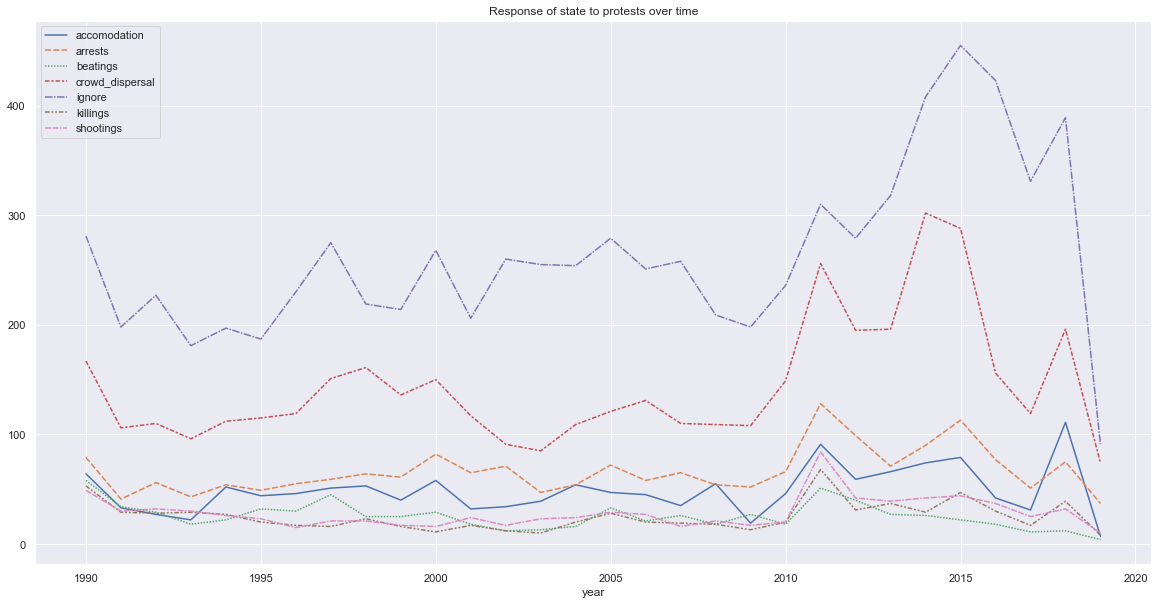

In [76]:
# How the response of state to protests is changing over time?
df_state = df.groupby(['year'])['accomodation', 'arrests', 'beatings', 'crowd_dispersal', 'ignore', 'killings', 'shootings'].sum()
df_state
plt.figure(figsize=(20, 10))
plt.title('Response of state to protests over time')
sns.set(style="darkgrid")

ax = sns.lineplot(data=df_state)

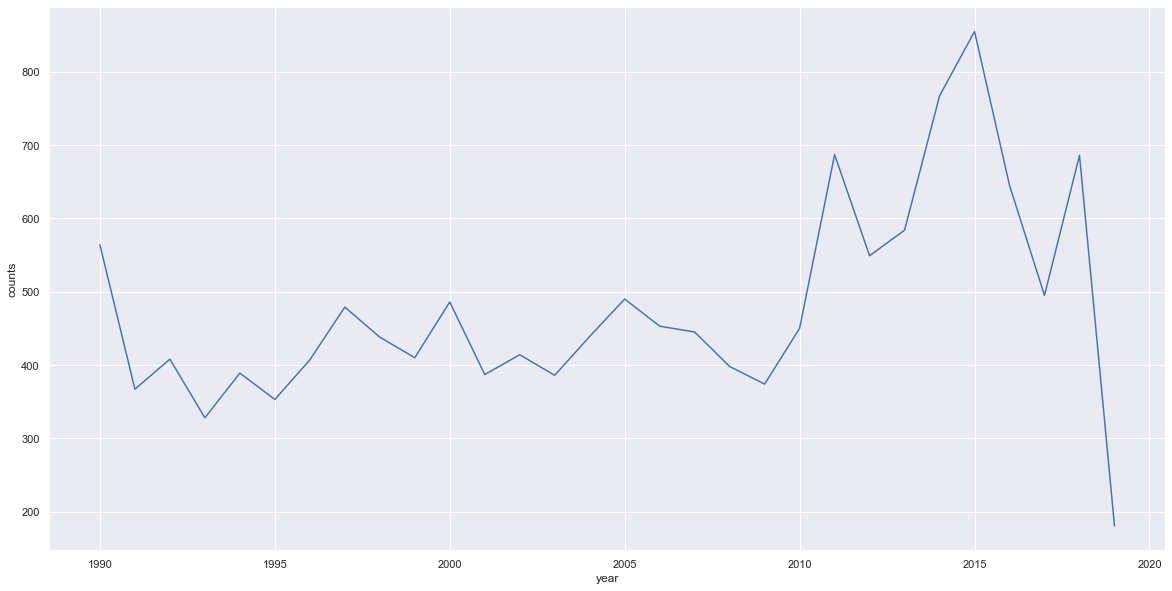

In [84]:
# Does the number of protests per year change over time?
nums_protest= df.groupby(['year'])['protest'].count().reset_index(name='counts')
nums_protest
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data=nums_protest, x='year', y='counts')